1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


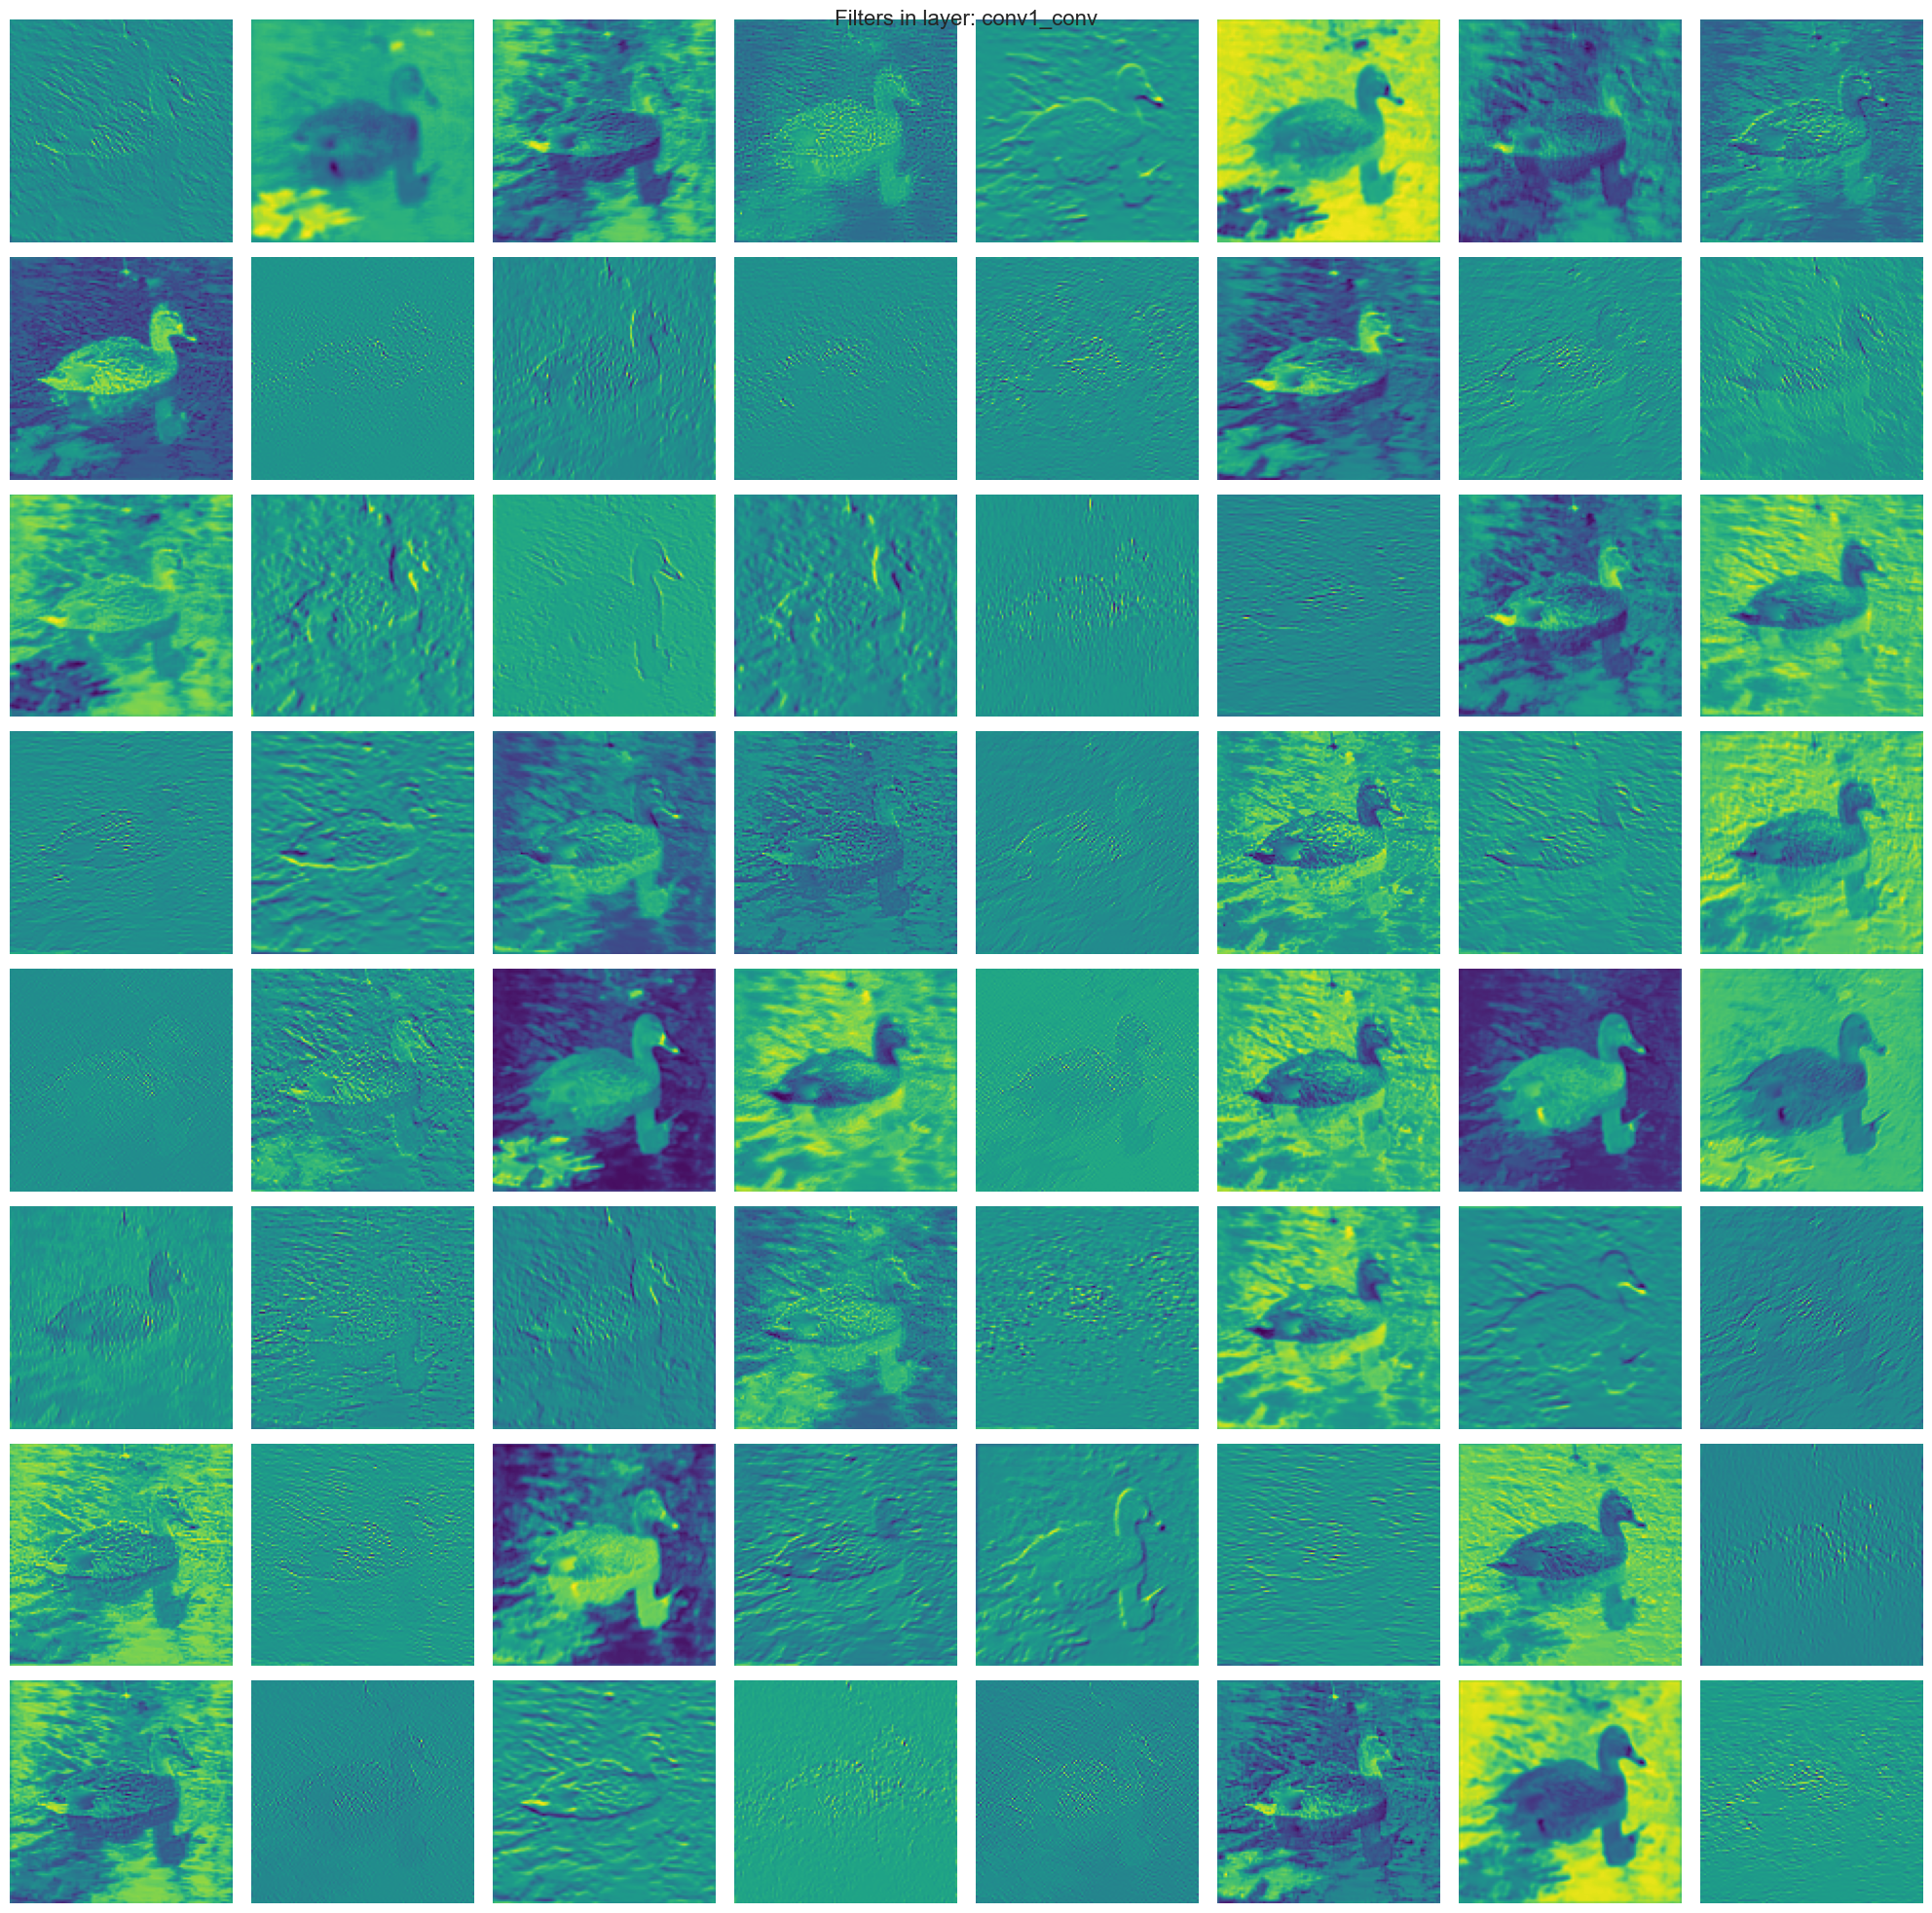

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step


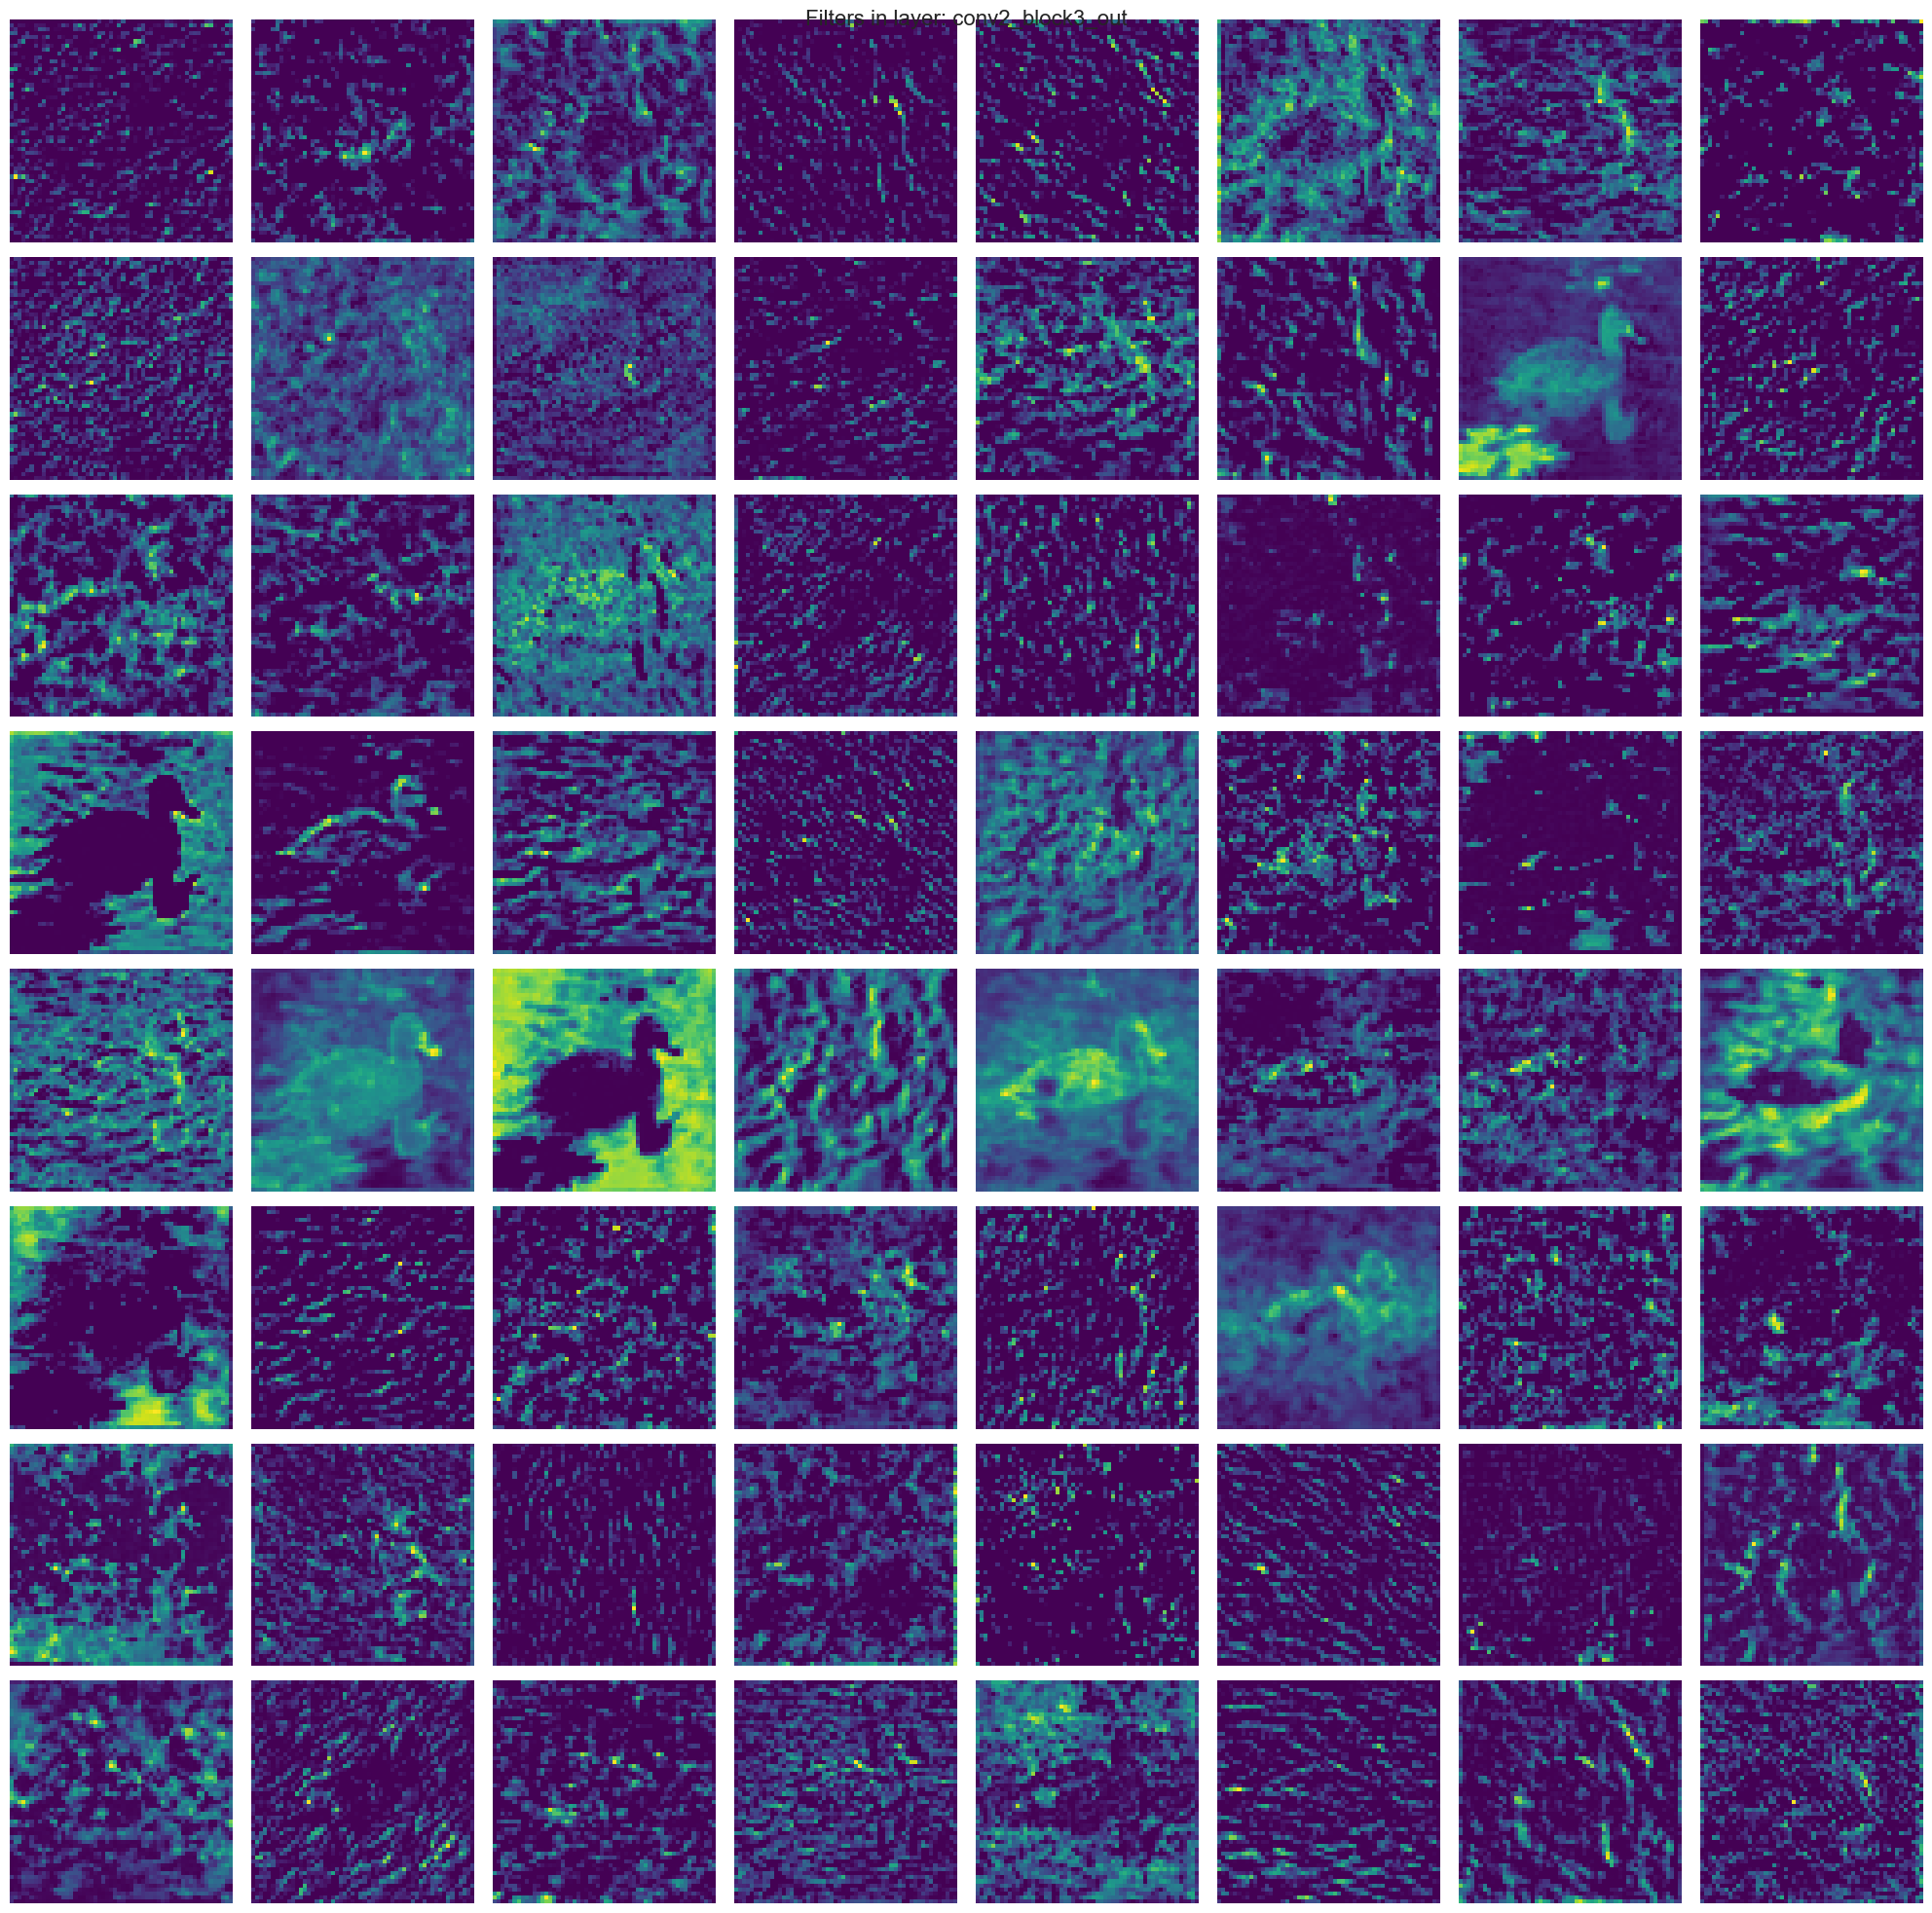

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step


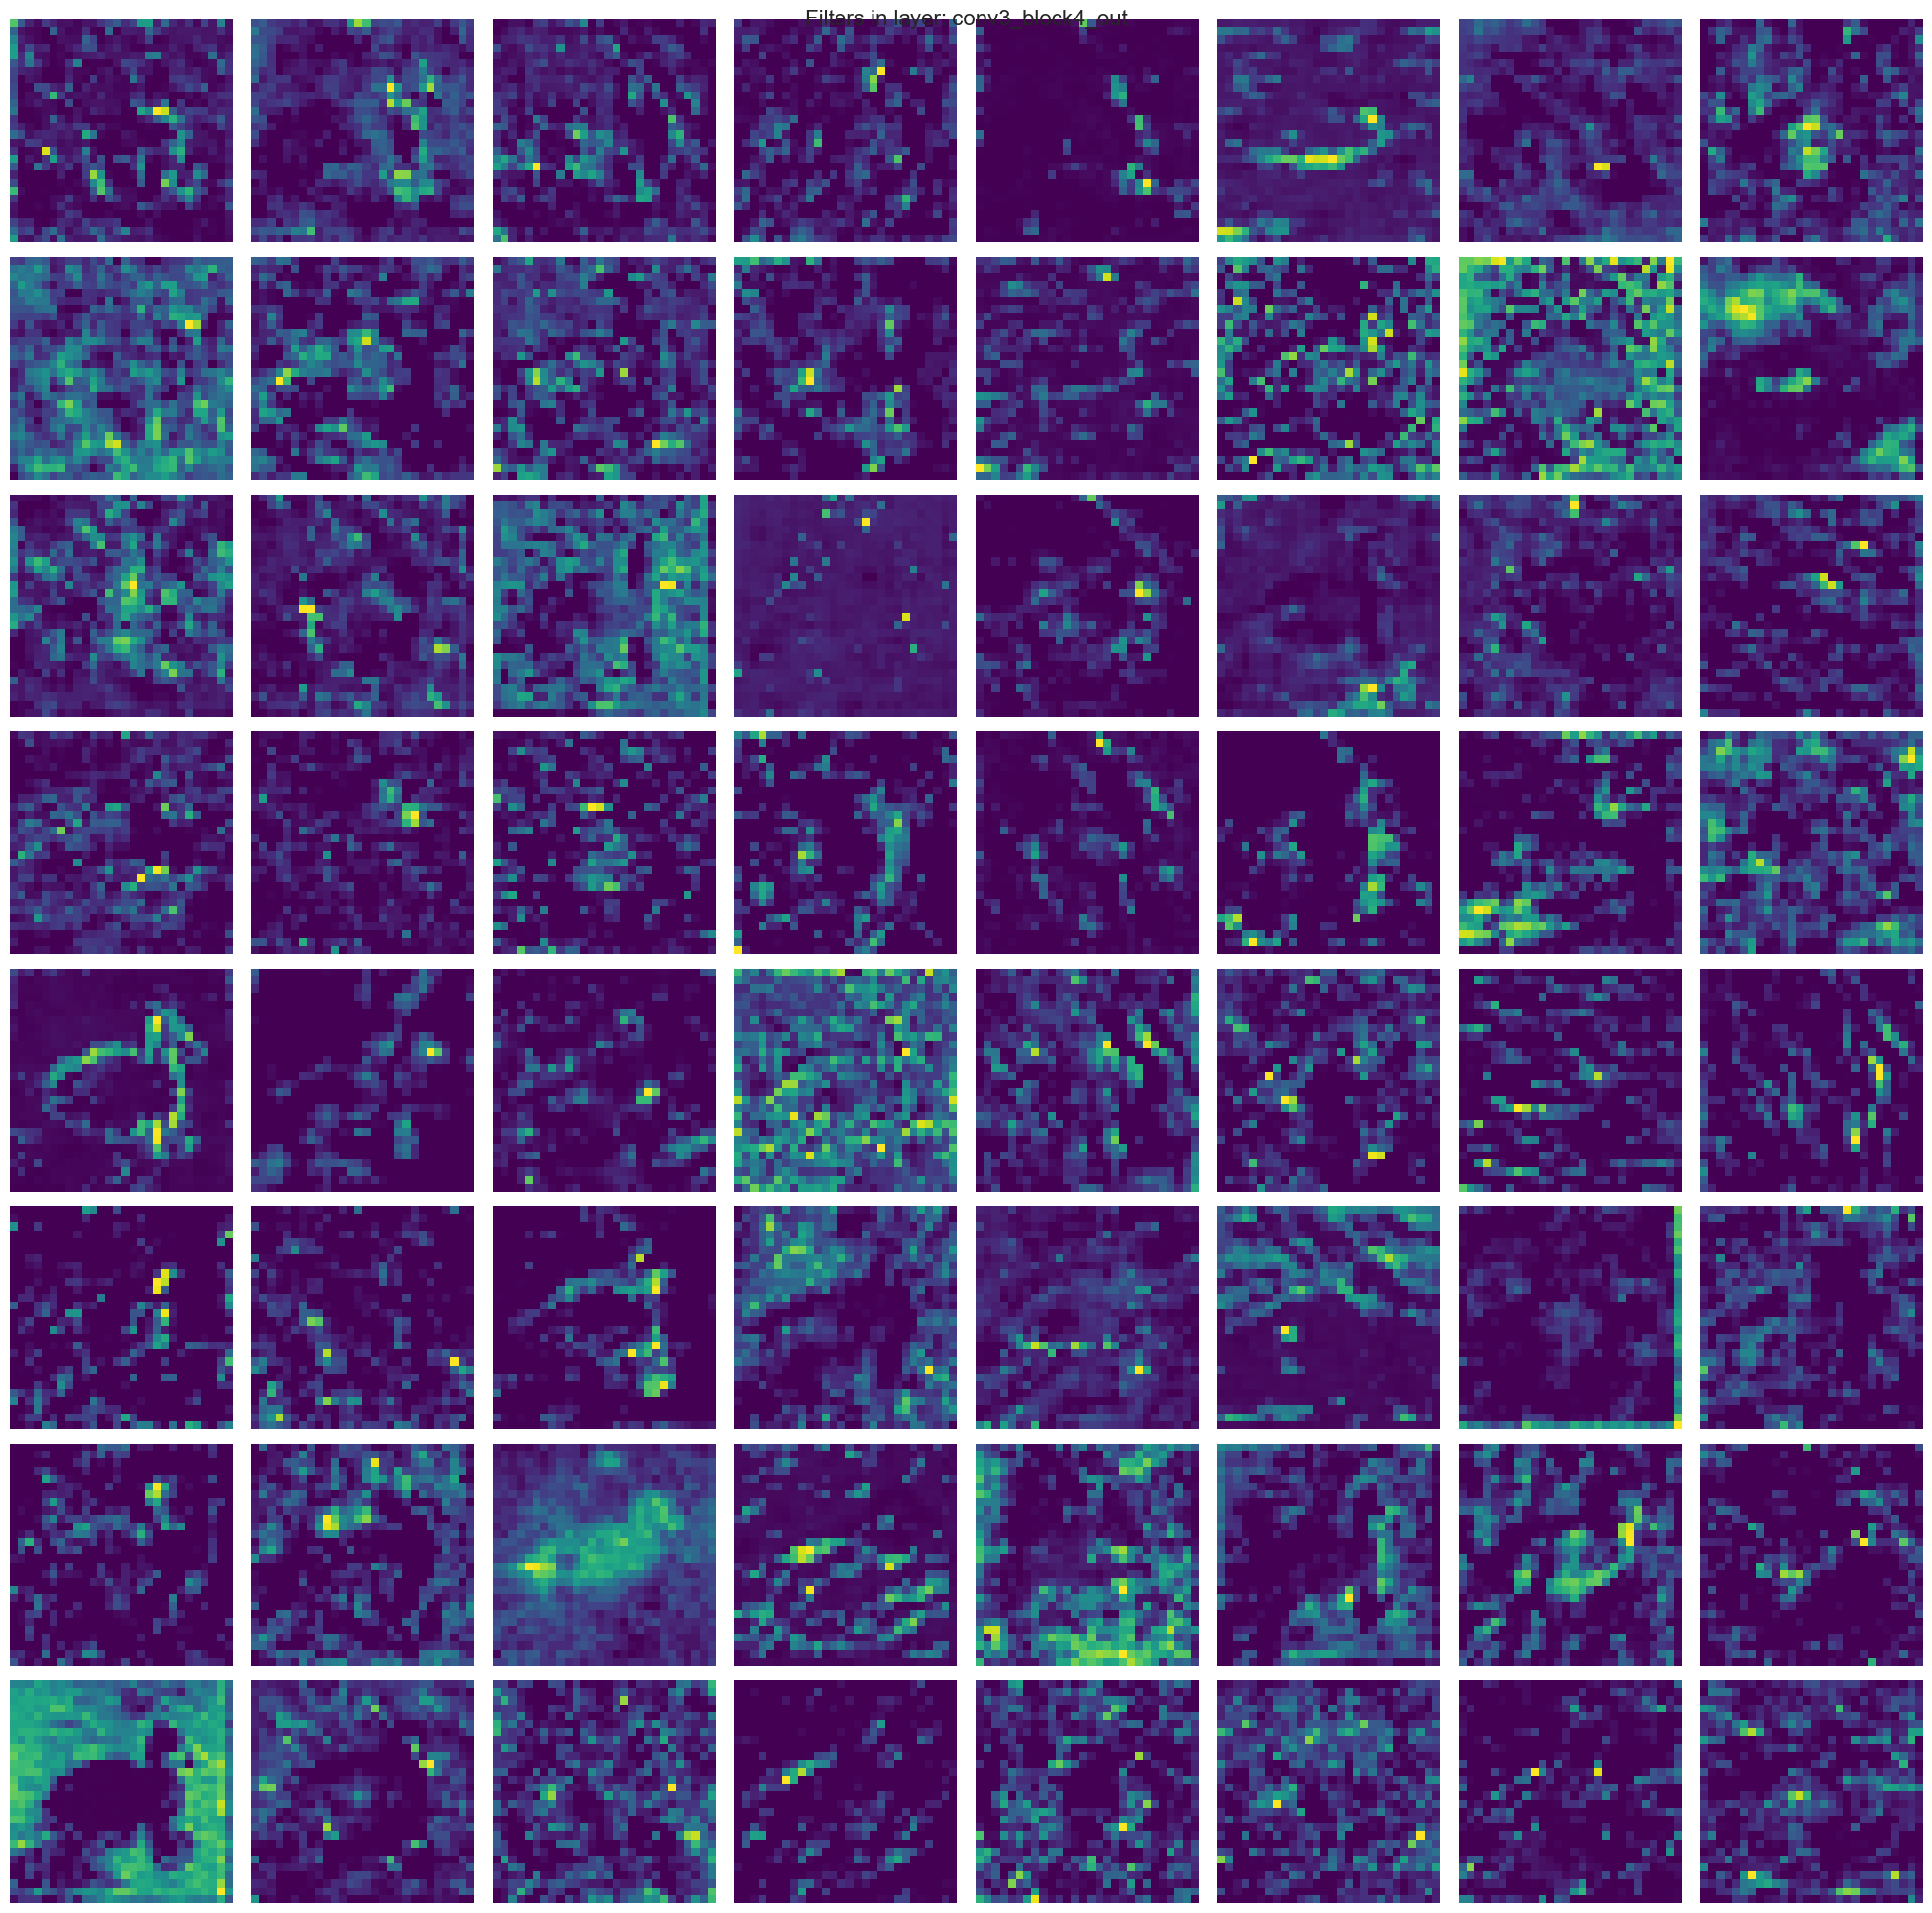

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 607ms/step


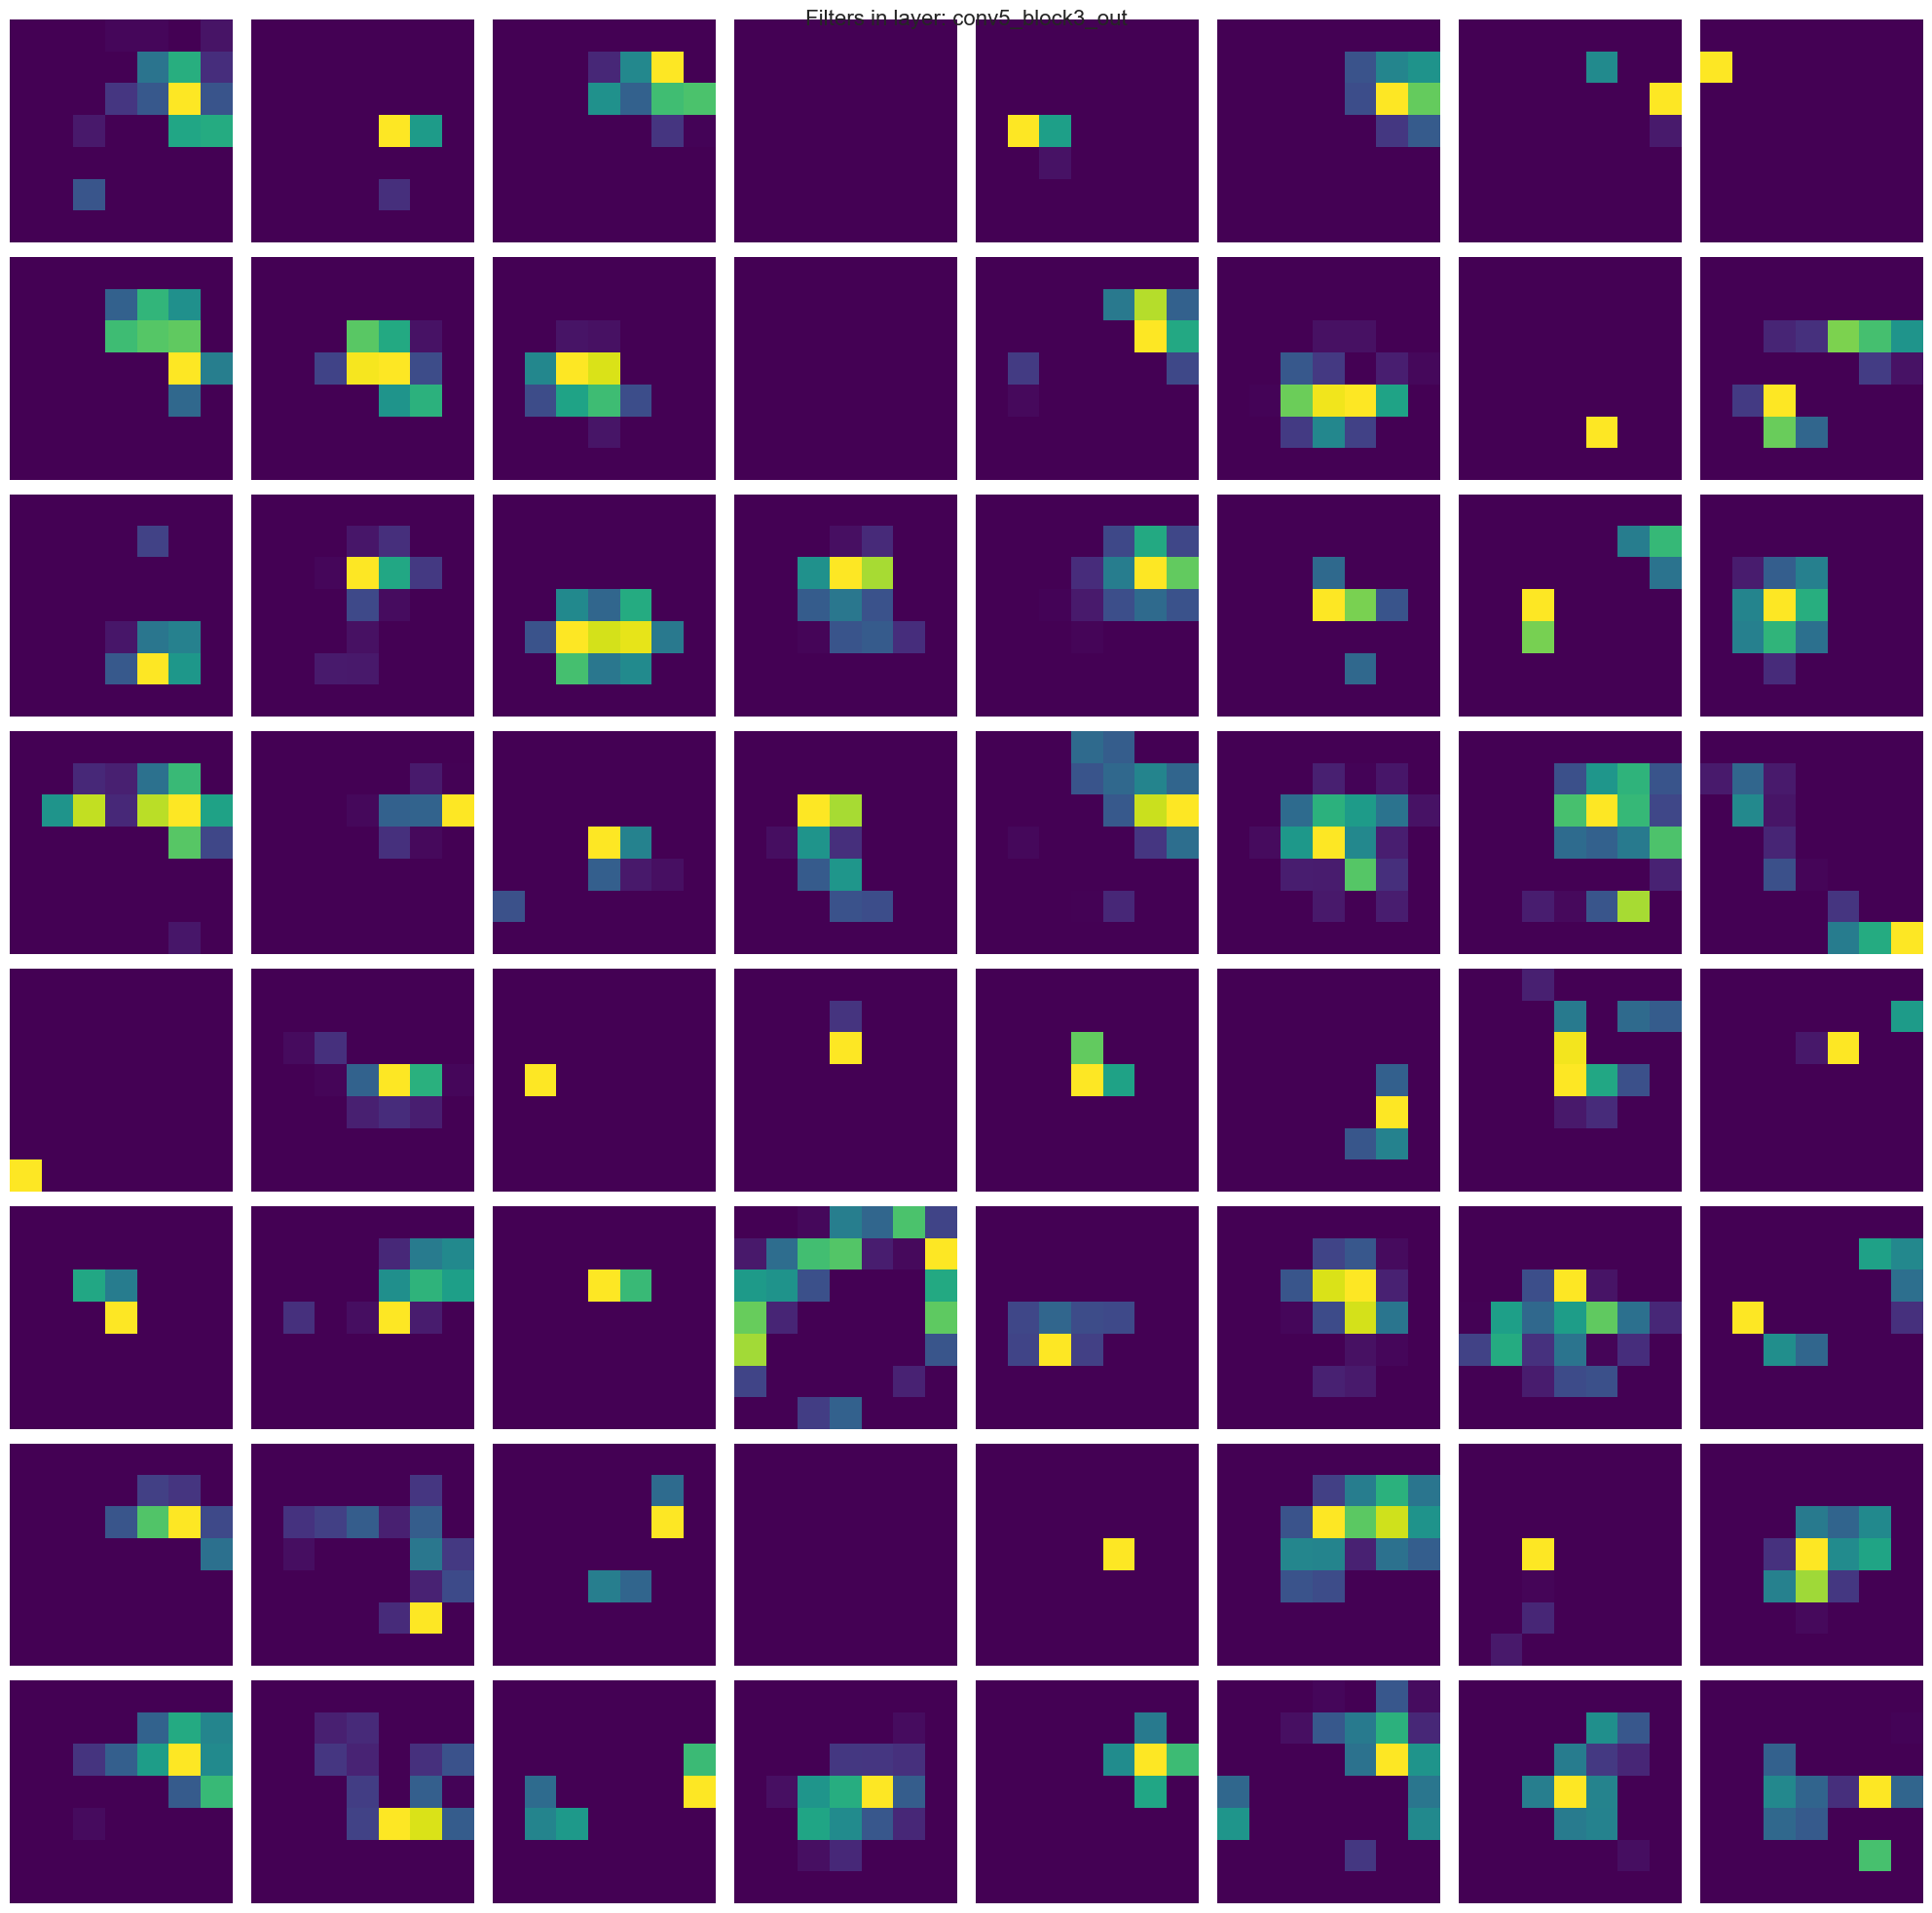

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 619ms/step
35363/35363 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
Top 3 predictions:
1: drake (0.97)
2: goose (0.02)
3: dowitcher (0.00)


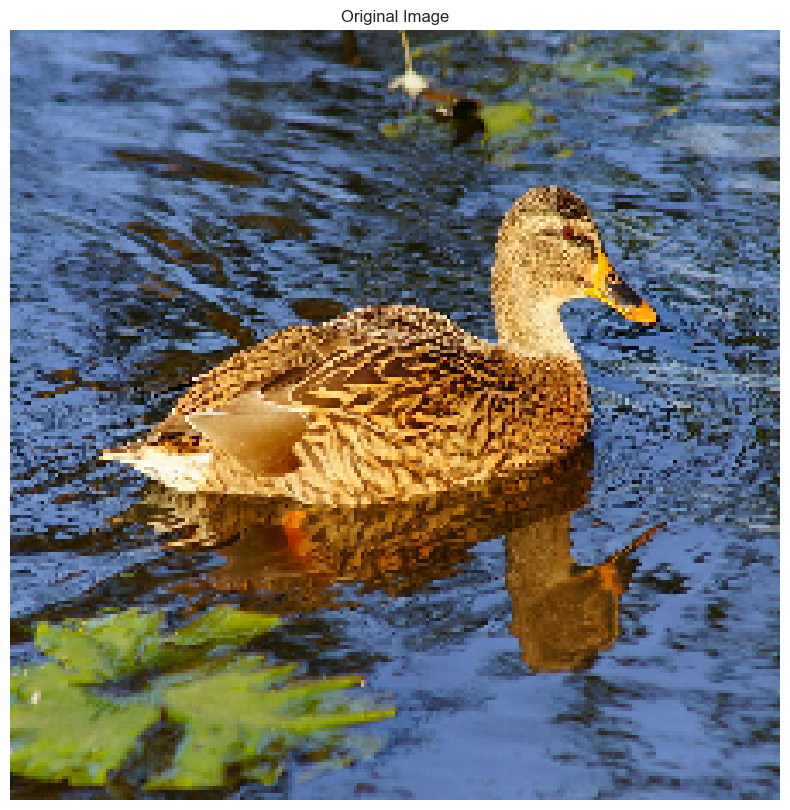

In [14]:
import keras

from keras.api.applications import resnet50
from keras.src.utils import load_img, img_to_array
import tensorflow as tf

from matplotlib import pyplot as plt
import numpy as np


# Load the pre-trained ResNet50 model
model = resnet50.ResNet50(weights='imagenet')

def preprocess_image(img_path, target_size=(224, 224)):
    img = load_img(img_path, target_size=target_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = resnet50.preprocess_input(img_array)
    return img_array

def visualize_layer_filters(img_array, layer_name, num_filters=64):
    # Get the output of the specified layer
    layer_output = model.get_layer(layer_name).output
    # Create a model that will output our desired layer's activations
    feature_extractor = keras.Model(inputs=model.inputs, outputs=layer_output)
    
    # Get the activations for our input image
    features = feature_extractor.predict(img_array)
    
    # Determine grid size
    num_rows = int(np.sqrt(num_filters))
    num_cols = int(np.ceil(num_filters / num_rows))
    
    # Create a grid of subplots
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
    fig.suptitle(f'Filters in layer: {layer_name}', fontsize=16)
    
    # Plot each filter
    for i in range(num_filters):
        row = i // num_cols
        col = i % num_cols
        filter_img = features[0, :, :, i]  # Get the i-th filter activation
        axes[row, col].imshow(filter_img, cmap='viridis')
        axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()

def predict_image(img_array):
    preds = model.predict(img_array)
    decoded_preds = resnet50.decode_predictions(preds, top=3)[0]
    
    print("Top 3 predictions:")
    for i, (imagenet_id, label, score) in enumerate(decoded_preds):
        print(f"{i + 1}: {label} ({score:.2f})")

def visualize_and_predict(img_path):
    # Preprocess the image
    img_array = preprocess_image(img_path)
    
    # Visualize layers
    layers_to_visualize = [
        'conv1_conv',        # Early layer
        'conv2_block3_out',  # Early-middle layer
        'conv3_block4_out',  # Middle layer
        'conv5_block3_out'   # Late layer
    ]
    
    for layer_name in layers_to_visualize:
        visualize_layer_filters(img_array, layer_name)
    
    # Make prediction
    predict_image(img_array)
    
    # Display the original image
    original_img = load_img(img_path, target_size=(224, 224))
    plt.figure(figsize=(10, 10))
    plt.imshow(original_img)
    plt.title('Original Image')
    plt.axis('off')
    plt.show()

# Example usage
img_path = 'images/duck1.jpg'  # Replace with the path to your image
visualize_and_predict(img_path)